In [1]:
from keras.datasets import mnist
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split
import time

(train_X, train_y), (test_X, test_y) = mnist.load_data()

print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

train_filter = np.where((train_y == 3 ) | (train_y == 7))
test_filter = np.where((test_y == 3) | (test_y == 7))

X_train, Y_train = train_X[train_filter], train_y[train_filter]
X_test, Y_test = test_X[test_filter], test_y[test_filter]

print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

# Flatten 
X_train = X_train.reshape(12396, 784)
X_test = X_test.reshape(2038, 784)

# Normalize
X_train = X_train / 255
X_test = X_test / 255

print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

11501568/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
X_train: (12396, 28, 28)
Y_train: (12396,)
X_test:  (2038, 28, 28)
Y_test:  (2038,)
X_train: (12396, 784)
Y_train: (12396,)
X_test:  (2038, 784)
Y_test:  (2038,)


In [2]:
#normalizing the Y data!!!!!
Y_train2=np.array([])
for y in Y_train:
  if(y==3):
    Y_train2=np.append(Y_train2,0)
  else:
    Y_train2=np.append(Y_train2,1)

Y_test2=np.array([])
for y in Y_test:
  if(y==3):
    Y_test2=np.append(Y_test2,0)
  else:
    Y_test2=np.append(Y_test2,1)

In [3]:
import time

class Gradient:
  def __init__(self, w_init, learning_rate, iterations):
      self.iterations = iterations
      self.w = w_init
      self.learning_rate = learning_rate
      self.y = np.array([])
      self.dim = 784

  def classError(self,Y,T):
      a=abs(Y-T)
      return sum(a)/len(a)
    
  def train(self, X, T):
      start_time = time.time()
      N = len(X)
      final_y = []
      E_plot = np.array([])
      MSE_plot = np.array([])
      test_plot = np.array([])
      for i in range(self.iterations):
        #learned_y = self.get_y(X, self.w)
        # TODO REPLACE
        learned_y = self.get_ybetter(X, self.w)

        #time comparisons temp
        dw = self.GDbetter(X, learned_y, T, N)

        self.w -= dw
        final_y = learned_y
        #MSE is not of interest 
        # MSE_plot = np.append(MSE_plot, self.MSE(final_y, T))
        E_plot = np.append(E_plot, self.errorValue(final_y, T,N,X))

        #tracks the test error
        X2=X_test
        N2 = len(X2)
        T2=Y_test2
        y2=self.get_ybetter(X2,self.w)
        test_plot = np.append(test_plot, self.errorValue(y2, T2,N2,X2))
        #temp
        # print("MSE") 
        # print(self.MSE(final_y, T))
        # print("errorval")
        # print(self.errorValue(final_y,T,N,X))
        if (i%1000==0):
          print(i)

    # Mean squared error is not the one we want
    #  self.plot(MSE_plot)
      print("time elapsed")
      print(str(time.time()-start_time) + "  seconds")
      print("final E(w) for training set")
      print(E_plot[-1])
      print("final E(w) for test set")
      print(test_plot[-1])
      print("training classification error")
      print(self.classError(self.get_ybetter(X, self.w),Y_train2))
      print("test classification error")
      print(self.classError(self.get_ybetter(X_test, self.w),Y_test2))

      self.plot(E_plot, 'Train')
      self.plot(test_plot, 'Test')
  
  #temp actual error function used?
  def errorValue(self,Y,T,N,X):
    a=np.dot(T,np.log(Y))
    b=np.dot((1-T),np.log(1-Y))
  
    
    return -1/N*(a+b)

  def MSE(self, Y, T):
    return np.mean(np.square(Y - T))

  def plot(self, xy, label):
    plt.title('minus log likelihood over iterations')
    plt.xlabel('Iteration')
    plt.ylabel('E(w) for both the test and training set')
    plt.plot(xy, label = " {} learning rate: {} ".format(label, self.learning_rate))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

  #attempt to optimize the GD calculation
  def GDbetter(self, X, Y, T, N):
    sub = np.subtract(Y,T) # this had an error was scalar instead of vector
    testres=np.dot(sub,X)/N
    return self.learning_rate * (testres)
    
  # NOT USED!!!
  # def GD(self, X, Y, T, N):
  #     total = np.array([])
  #     #for i , 1 ... d
  #     for i in range(self.dim):
          
  #         #subtract vector t from y
  #         sub = np.subtract(Y,T) # this had an error was scalar instead of vector
  #         #take 1/N the inner product of this vector and the vector x[i] which is equal 1/N times the sum of elementwise multiplication
  #         gradres = np.dot(sub, X.T[i])/N
  #         total = np.append(total, gradres)

  #     return self.learning_rate * (total)

  def sigmoid(self, x):
      return (1/(1+np.exp(-x)))

  #attempt to optimize
  def get_ybetter(self, x, w):
    self.y = np.array([])
    wx = np.dot(w,x.T)
    y=self.sigmoid(wx)
    return(y)

  # NOT USED
  # def get_y(self, x, w):
  #   self.y = np.array([])
  #   for x_u in x:
  #     #dot product of w,x^u
  #     wx = np.dot(w, x_u) 

  #     # sigmoid function on this inner product
  #     y_u = self.sigmoid(wx)
     
  #     # y is a vector over the u
  #     self.y = np.append(self.y, y_u)
  #   print(self.y.shape)
  #   return(self.y)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
time elapsed
162.19111394882202  seconds
final E(w) for training set
0.04867061980099814
final E(w) for test set
0.06211667018126508
training classification error
0.030959336727789864
test classification error
0.03538187160450081
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
time elapsed
161.312997341156  seconds
final E(w) for training set
0.03415175413693584
final E(w) for test set
0.0511734259941655
training classification error
0.020437676640852297
test classification error
0.025984260200385304
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
time elapsed
159.77100276947021  seconds
final E(w) for training set
0.026086836276176143
final E(w) for test set
0.04896662692247227
training classification error
0.015503670000301154
test classification error
0.02214968733379718
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
time elapsed
160.91336703300476  seconds
final E(w) for training set
0.020966885635917917
final E(w) for test set
0.0525518

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log


7000
8000
9000
time elapsed
163.941903591156  seconds
final E(w) for training set
nan
final E(w) for test set
nan
training classification error
0.007967786671887772
test classification error
0.021500938134360267


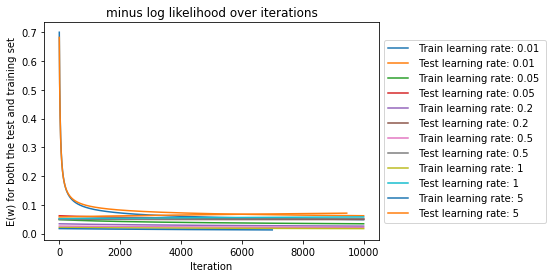

In [4]:
gradient = Gradient(np.random.uniform(size=784), 0.01, 10)

#make w approximately normalized
initw=np.random.uniform(size=784)
#normalize the initial weights
initw=initw/(np.sum(initw))


iterationscount=10000

gradient = Gradient(initw, 0.01, iterationscount)

# try different rate
gradient2 = Gradient(initw, 0.05, iterationscount)

gradient3 = Gradient(initw, 0.2, iterationscount)

gradient4 = Gradient(initw, 0.5, iterationscount)

gradient5 = Gradient(initw, 1, iterationscount)

gradient6 = Gradient(initw, 5, iterationscount)

gradient.train(X_train, Y_train2)
gradient2.train(X_train, Y_train2)
gradient3.train(X_train, Y_train2)
gradient4.train(X_train, Y_train2)
gradient5.train(X_train, Y_train2)
gradient6.train(X_train, Y_train2)

# Discussion of early stopping and learning rates.
A higher learning rate means faster reduction of the training error but the test error seems to lag behind, presumably this will result wil in worse results in the long term. An example of how it can turn out bad would be the following image:

![image.png](https://media.discordapp.net/attachments/895043015368912936/906893498182160454/Screen-Shot-2018-02-24-at-11.png)


Early stopping can be helpfull when if the stopping criteria are definded in a propper manner. If this is not done we can stop too early before the model gets out of it's local optima. An example of this can be found in the image below.
In this image we could stop before the model reaches the modern regime. 

![image.png](https://media.discordapp.net/attachments/895043015368912936/906897112875278366/unknown.png)

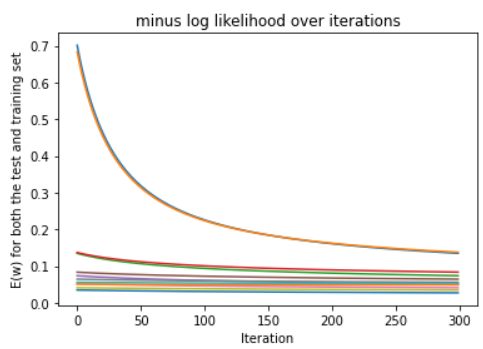



In [5]:

import time
class Momentum:
  def __init__(self, w_init, learning_rate, iterations, momentum):
      self.momentum = momentum
      self.iterations = iterations
      self.w = w_init
      self.learning_rate = learning_rate
      self.y = np.array([])
      self.dim = 784
    
  def train(self, X, T):
      start_time = time.time()
      N = len(X)
      final_y = []
      dw = 0
      E_plot = np.array([])
      MSE_plot = np.array([])
      test_plot = np.array([])
      for i in range(self.iterations):
        learned_y = self.get_y(X, self.w)
        dw = self.GD(X, learned_y, T, N, dw)
        self.w -= dw
        final_y = learned_y  
        #MSE instead of errorValue
        MSE_plot = np.append(MSE_plot, self.errorValue(final_y, T,N,X))
        X2=X_test
        N2 = len(X2)
        T2=Y_test2
        y2=self.get_ybetter(X2,self.w)
        test_plot = np.append(test_plot, self.errorValue(y2, T2,N2,X2))
        #E_plot = np.append(E_plot, self.errorValue(final_y, T,N,X))

      # self.plot(E_plot)
      self.plot(MSE_plot)
      self.plot(test_plot)

      print("time elapsed")
      print(str(time.time()-start_time) + "  seconds")
      print("final E(w) for training set")
      print(MSE_plot[-1])
      print("final E(w) for test set")
      print(test_plot[-1])
      print("training classification error")
      print(self.classError(self.get_ybetter(X, self.w),Y_train2))
      print("test classification error")
      print(self.classError(self.get_ybetter(X_test, self.w),Y_test2))

  def errorValue(self,Y,T,N,X):
    a=np.dot(T,np.log(Y))
    b=np.dot((1-T),np.log(1-Y))
  
    
    return -1/N*(a+b)


  def classError(self,Y,T):
    a=abs(Y-T)
    return sum(a)/len(a)

  def MSE(self, Y, T):
    return np.mean(np.square(Y - T))

  def plot(self, xy):
    plt.title('Error over iterations with Momentum')
    plt.xlabel('Iteration')
    plt.ylabel('Error value')
    plt.plot(xy)

  # def GD(self, X, Y, T, N, dw = 0):
  #     total = np.array([])
  #     #for i , 1 ... d
  #     for i in range(self.dim):
          
  #         #subtract vector t from y
  #         sub = np.subtract(Y,T) # this had the error was scalar instead of vector
  #         #take 1/N the inner product of this vector and the vector x[i] which is equal 1/N times the sum of elementwise multiplication
  #         gradres = np.dot(sub, X.T[i])/N
  #         total = np.append(total, gradres)

  #     return self.learning_rate * (total) + self.momentum * dw

  def sigmoid(self, x):
      return (1/(1+np.exp(-x)))

  # def get_y(self, x, w):
  #   self.y = np.array([])
  #   for x_u in x:
  #     #dot product of w,x^u
  #     wx = np.dot(w, x_u) 

  #     # sigmoid function on this inner product
  #     y_u = self.sigmoid(wx)
     
  #     # y is a vector over the u
  #     self.y = np.append(self.y, y_u)

  #   return(self.y)

  #attempt to optimize
  def get_y(self, x, w):
    self.y = np.array([])
    wx = np.dot(w,x.T)
    y=self.sigmoid(wx)
    return(y)
  

  # different name for same function 
  def get_ybetter(self, x, w):
    self.y = np.array([])
    wx = np.dot(w,x.T)
    y=self.sigmoid(wx)
    return(y)

    #attempt to optimize the GD calculation
  def GD(self, X, Y, T, N,dw=0):
    sub = np.subtract(Y,T) # this had an error was scalar instead of vector
    testres=np.dot(sub,X)/N
    return self.learning_rate * (testres)+self.momentum*dw

time elapsed
160.48985600471497  seconds
final E(w) for training set
0.03111154028203083
final E(w) for test set
0.04962158357685613
training classification error
0.01846873257492891
test classification error
0.02432998053408707


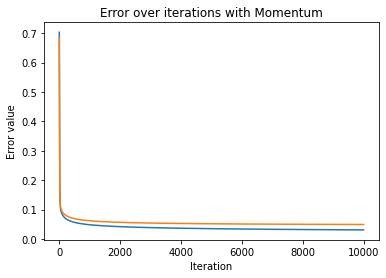

In [6]:
initw=np.random.uniform(size=784)
#normalize the initial weights
initw=initw/(np.sum(initw))

momentum = Momentum(initw, 0.01, 10000, 0.9)
momentum.train(X_train, Y_train2)

In [7]:
class WeightDecay:
  def __init__(self, w_init, learning_rate, iterations, momentum, weight_decay = 0.1):
      self.momentum = momentum
      self.weight_decay = weight_decay
      self.iterations = iterations
      self.w = w_init
      self.learning_rate = learning_rate
      self.y = np.array([])
      self.dim = 784
    
  def train(self, X, T):
      start_time = time.time()
      test_plot = np.array([])
      N = len(X)
      final_y = []
      dw = 0
      E_plot = np.array([])
      MSE_plot = np.array([])
      for i in range(self.iterations):
        learned_y = self.get_y(X, self.w)
        dw = self.GD(X, learned_y, T, N, dw)
        self.w -= dw
        final_y = learned_y  
        #MSE instead of errorValue
        MSE_plot = np.append(MSE_plot, self.errorValue(final_y, T,N,X))
        # E_plot = np.append(E_plot, self.errorValue(final_y, T,N,X))
        X2=X_test
        N2 = len(X2)
        T2=Y_test2
        y2=self.get_ybetter(X2,self.w)
        test_plot = np.append(test_plot, self.errorValue(y2, T2,N2,X2))


      print("time elapsed")
      print(str(time.time()-start_time) + "  seconds")
      print("final E(w) for training set")
      print(MSE_plot[-1])
      print("final E(w) for test set")
      print(test_plot[-1])
      print("training classification error")
      print(self.classError(self.get_ybetter(X, self.w),Y_train2))
      print("test classification error")
      print(self.classError(self.get_ybetter(X_test, self.w),Y_test2))

      # self.plot(E_plot)
      self.plot(MSE_plot)
      self.plot(test_plot)

  def classError(self,Y,T):
    a=abs(Y-T)
    return sum(a)/len(a)

  def errorValue(self,Y,T,N,X):
    a=np.dot(T,np.log(Y))
    b=np.dot((1-T),np.log(1-Y))
    return -1/N*(a+b)

  def MSE(self, Y, T):
    return np.mean(np.square(Y - T))

  def plot(self, xy):
    plt.title('Error over iterations with Weight decay')
    plt.xlabel('Iteration')
    plt.ylabel('E value')
    plt.plot(xy)


  # # seems incorrect
  # def GD(self, X, Y, T, N, dw = 0):
  #     total = np.array([])
  #     #for i , 1 ... d
  #     for i in range(self.dim):
          
  #         #subtract vector t from y
  #         sub = np.subtract(Y,T) # this had the error was scalar instead of vector
  #         #take 1/N the inner product of this vector and the vector x[i] which is equal 1/N times the sum of elementwise multiplication
  #         gradres = np.dot(sub, X.T[i])/N
  #         reg_term = (self.weight_decay / (2 * self.dim)) * self.w[i]
  #         total = np.append(total, gradres)
        

  #     return self.learning_rate * (total) + self.momentum * dw

  def sigmoid(self, x):
      return (1/(1+np.exp(-x)))

  # def get_y(self, x, w):
  #   self.y = np.array([])
  #   for x_u in x:
  #     #dot product of w,x^u
  #     wx = np.dot(w, x_u) 

  #     # sigmoid function on this inner product
  #     y_u = self.sigmoid(wx)
     
  #     # y is a vector over the u
  #     self.y = np.append(self.y, y_u)

  #   return(self.y)
    
  #optimized
  def get_y(self, x, w):
    self.y = np.array([])
    wx = np.dot(w,x.T)
    y=self.sigmoid(wx)
    return(y)

  #same func different name
  def get_ybetter(self, x, w):
    self.y = np.array([])
    wx = np.dot(w,x.T)
    y=self.sigmoid(wx)
    return(y)

    #attempt to optimize the GD calculation
  def GD(self, X, Y, T, N,dw=0):
    sub = np.subtract(Y,T) # this had an error was scalar instead of vector
    testres=np.dot(sub,X)/N
    testres+=np.sum(self.w)*(self.weight_decay/N)
    return self.learning_rate * (testres)+self.momentum*dw

time elapsed
86.17527389526367  seconds
final E(w) for training set
0.034966066698184514
final E(w) for test set
0.051384950760652914
training classification error
0.02097287232700573
test classification error
0.0264175389380124


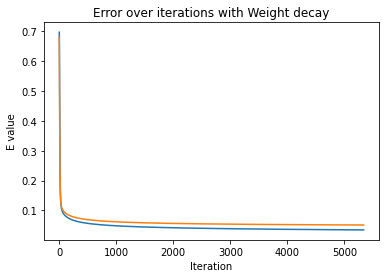

In [8]:
weight = WeightDecay(np.random.uniform(size=784)/784, 0.01, 5340, 0.9, 0.1)
weight.train(X_train, Y_train2)

In [21]:
class Newton:
  def __init__(self, w_init, learning_rate, iterations):
      self.iterations = iterations
      self.w = w_init
      self.learning_rate = learning_rate
      self.y = np.array([])
      self.dim = 784
      self.weight_decay = 0.1
    
  def train(self, X, T):
      start_time = time.time()
      test_plot = np.array([])
      N = len(X)
      final_y = []
      E_plot = np.array([])
      for i in range(self.iterations):
        learned_y = self.get_y(X, self.w)
        # hessian = self.Hessian(X, learned_y, N)
        dw = self.GD(X, learned_y, T, N)

        self.w -= dw
        final_y = learned_y

        E_plot = np.append(E_plot, self.errorValue(final_y, T,N,X))
        X2=X_test
        N2 = len(X2)
        T2=Y_test2
        y2=self.get_ybetter(X2,self.w)
        test_plot = np.append(test_plot, self.errorValue(y2, T2,N2,X2))
      self.plot(E_plot)
      self.plot(test_plot)
      print("time elapsed")
      print(str(time.time()-start_time) + "  seconds")
      print("final E(w) for training set")
      print(E_plot[-1])
      print("final E(w) for test set")
      print(test_plot[-1])
      print("training classification error")
      print(self.classError(self.get_ybetter(X, self.w),Y_train2))
      print("test classification error")
      print(self.classError(self.get_ybetter(X_test, self.w),Y_test2))

  def MSE(self, Y, T):
    return np.mean(np.square(Y - T))

  def errorValue(self,Y,T,N,X):
    a=np.dot(T,np.log(Y))
    b=np.dot((1-T),np.log(1-Y))
    return -1/N*(a+b)

  def plot(self, xy):
    plt.title('E(w) over iterations')
    plt.xlabel('Iteration')
    plt.ylabel('E(w) value')
    plt.plot(xy)

  # def GD(self, X, Y, T, N):
  #     total = np.array([])
  #     #for i , 1 ... d
  #     for i in range(self.dim):
          
  #         #subtract vector t from y
  #         sub = np.subtract(Y,T) # this had the error was scalar instead of vector
  #         #take 1/N the inner product of this vector and the vector x[i] which is equal 1/N times the sum of elementwise multiplication
  #         gradres = np.dot(sub, X.T[i])/N
  #         total = np.append(total, gradres)

  #     return self.learning_rate * (total)
  
  # def Hessian(self, X, Y, N):
  #     total = np.array([])
  #     middle = 1 - Y
  #     for i in range(self.dim):
  #         left = np.dot(Y, X.T[i])
  #         right = np.dot(middle, X.T[i])
  #         total = np.append(total, np.dot(left, right)/N) 

  #     return total

  def sigmoid(self, x):
      return (1/(1+np.exp(-x)))

  # def get_y(self, x, w):
  #   self.y = np.array([])
  #   for x_u in x:
  #     #dot product of w,x^u
  #     wx = np.dot(w, x_u) 

  #     # sigmoid function on this inner product
  #     y_u = self.sigmoid(wx)
     
  #     # y is a vector over the u
  #     self.y = np.append(self.y, y_u)

    #attempt to optimize
  def get_y(self, x, w):
    self.y = np.array([])
    wx = np.dot(w,x.T)
    y=self.sigmoid(wx)
    return(y)


  #same func different name
  def get_ybetter(self, x, w):
    self.y = np.array([])
    wx = np.dot(w,x.T)
    y=self.sigmoid(wx)
    return(y)

  def classError(self,Y,T):
    a=abs(Y-T)
    return sum(a)/len(a)





    #still has an error, something is def wrong with the lin alg
  def GD_old(self, X, Y, T, N):
    sub = np.subtract(Y,T) 
    testres=np.dot(sub,X)/N

    #hessian 
    sub2=Y*(1-Y)
    hessian=np.dot(sub2,X)
    #take sqrt since we multiply this with itself
    # hessian=np.sqrt(hessian)

    #added dimension for getting cartesian product
    h2=np.array([hessian])
    hessian=np.dot(h2.T,h2)
    # print(hessian.shape)

    #add weight decay term
    hessian+=self.weight_decay/N
   
    # h3=np.array([X])
    # a=np.transpose(h3,[1,2,0])
    # b=np.transpose(h3,[1,0,2])
    # print(a.shape)
    # print(b.shape)
    # print(np.dot(a,b).shape)

    # Because Hessian determinant is 0 we can't inverse, so we need to use psuedo inverse here.
    # print(np.linalg.det(hessian))
    inverse=np.linalg.pinv(hessian)
    # print(inverse.shape)

    print(testres.shape)
    print(hessian.shape)
    return -self.learning_rate *np.dot(hessian,testres)

  #attempts to do this with loops (obviously very slow)
  def GD(self, X, Y, T, N):
    #normal GD
    sub = np.subtract(Y,T) 
    testres=np.dot(sub,X)/N

    #hessian
    transedX=X.T
    d=len(transedX)
    hessian=np.zeros((d,d))

    sub2=Y*(1-Y)
    print(sub.shape)
    for i in range(d):
      X1=transedX[i]
      for j in range(d):
        X2=transedX[j]
        hessian[i][j]=np.dot(X1*X2,sub2)/N+self.weight_decay/self.dim

    print(X1.shape)
    hessian=np.linalg.pinv(hessian)
    return np.dot(hessian,testres)
        




(12396,)
(12396,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: RuntimeWarning: divide by zero encountered in log


(12396,)
(12396,)
(12396,)
(12396,)
(12396,)
(12396,)
(12396,)
(12396,)
time elapsed
353.84661626815796  seconds
final E(w) for training set
0.030383884444850344
final E(w) for test set
inf
training classification error
0.015283769443859473
test classification error
0.02644775299714958


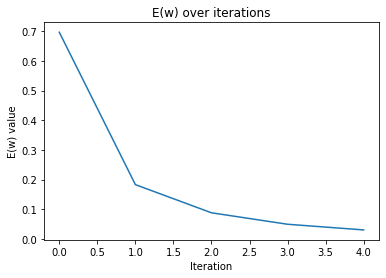

In [22]:
newton = Newton(np.random.uniform(size=784)/784, 0.01, 5)
# print(X_train.shape)
# print(Y_train.shape)
newton.train(X_train, Y_train2)

In [11]:
import time

#minimization
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar

#params to pass for optmization
# xop=0
# wop=0
# top=0

# def Eoptimize(c):
#   Y= get_yop( xop, c*wop)
#   a=np.dot(top,np.log(Y))
#   b=np.dot((1-top),np.log(1-Y))
#   return -1/N*(a+b)


# def get_yop(x, w):
#     print(xop)
#     wx = np.dot(w,xop.T)
#     y=sigmoidop(wx)
#     return(y)

# def sigmoidop(x):
#       return (1/(1+np.exp(-x)))

def test(x):
  return x

res = minimize_scalar(test, bracket=None, bounds=[-10,10], args=(), method='bounded', tol=None, options=None)
print(res)





class LineSearch:
  def __init__(self, w_init, learning_rate, iterations):
      self.iterations = iterations
      self.w = w_init
      self.learning_rate = learning_rate
      self.y = np.array([])
      self.dim = 784

      #constants for optimization
      self.xop=0
      self.wop=0
      self.top=0
      self.dwop=0



  def test(self,x):
    return x

  def Eoptimize(self,a):
    Y=self.get_ybetter( self.xop, self.wop+self.dwop*a)
    res=self.errorValue(Y,self.top,self.dim,self.xop)
    return self.errorValue(Y,self.top,self.dim,self.xop)

  # find the a such that E(w+ad) is minimized and return ad
  def linOptimize(self,d,W,X,T):
    a=1
    self.wop=W
    self.xop=X
    self.top=T
    self.dwop=d
    #note: shrinking the bound over time could speed things up
    res=minimize_scalar(self.Eoptimize, bracket=None, bounds=[0,1000], args=(), method='bounded', tol=None, options=None)
    # print(res)
    # get the resulting scalar
    a=res["x"]

    return a*d
  
  def train(self, X, T):
      start_time = time.time()
      N = len(X)
      final_y = []
      E_plot = np.array([])
      MSE_plot = np.array([])
      test_plot = np.array([])
      for i in range(self.iterations):
        #learned_y = self.get_y(X, self.w)
        # TODO remove above 
        learned_y = self.get_ybetter(X, self.w)

        #time comparisons temp
        dw = -self.GDbetter(X, learned_y, T, N)




        #looks for the best scalar to add to dw
        #constants for optimization
        self.xop=X
        self.wop=self.w
        self.top=T
        self.dwop=dw
        self.w += self.linOptimize(dw,self.w,X,T)

        final_y = learned_y
        #MSE is not of interest 
        # MSE_plot = np.append(MSE_plot, self.MSE(final_y, T))
        E_plot = np.append(E_plot, self.errorValue(final_y, T,N,X))

        #tracks the test error
        X2=X_test
        N2 = len(X2)
        T2=Y_test2
        y2=self.get_ybetter(X2,self.w)
        test_plot = np.append(test_plot, self.errorValue(y2, T2,N2,X2))
        #temp
        # print("MSE") 
        # print(self.MSE(final_y, T))
        # print("errorval")
        # print(self.errorValue(final_y,T,N,X))
        if (i%10==0):
          print(i)

    # Mean squared error is not the one we want
    #  self.plot(MSE_plot)
      print("time elapsed")
      print(str(time.time()-start_time) + "  seconds")
      print("final E(w) for training set")
      print(E_plot[-1])
      print("final E(w) for test set")
      print(test_plot[-1])
      print("training classification error")
      print(self.classError(self.get_ybetter(X, self.w),Y_train2))
      print("test classification error")
      print(self.classError(self.get_ybetter(X_test, self.w),Y_test2))

      self.plot(E_plot, 'Train')
      self.plot(test_plot, 'Test')
  
  #actual error function used
  def errorValue(self,Y,T,N,X):
    a=np.dot(T,np.log(Y))
    b=np.dot((1-T),np.log(1-Y))
  
    
    return -1/N*(a+b)

  def MSE(self, Y, T):
    return np.mean(np.square(Y - T))

  def plot(self, xy, label):
    plt.title('minus log likelihood over iterations')
    plt.xlabel('Iteration')
    plt.ylabel('E(w) for both the test and training set')
    plt.plot(xy, label = " {} learning rate: {} ".format(label, self.learning_rate))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

  #attempt to optimize the GD calculation
  def GDbetter(self, X, Y, T, N):
    sub = np.subtract(Y,T) # this had an error was scalar instead of vector
    testres=np.dot(sub,X)/N
    return self.learning_rate * (testres)
    
  # NOT USED!!!
  # def GD(self, X, Y, T, N):
  #     total = np.array([])
  #     #for i , 1 ... d
  #     for i in range(self.dim):
          
  #         #subtract vector t from y
  #         sub = np.subtract(Y,T) # this had an error was scalar instead of vector
  #         #take 1/N the inner product of this vector and the vector x[i] which is equal 1/N times the sum of elementwise multiplication
  #         gradres = np.dot(sub, X.T[i])/N
  #         total = np.append(total, gradres)

  #     return self.learning_rate * (total)

  def sigmoid(self, x):
      return (1/(1+np.exp(-x)))


  def classError(self,Y,T):
    a=abs(Y-T)
    return sum(a)/len(a)

  #attempt to optimize
  def get_ybetter(self, x, w):
    self.y = np.array([])
    wx = np.dot(w,x.T)
    y=self.sigmoid(wx)
    return(y)

     fun: -9.99999335625205
 message: 'Solution found.'
    nfev: 31
  status: 0
 success: True
       x: -9.99999335625205


0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:141: RuntimeWarning: divide by zero encountered in log


10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
time elapsed
57.32661437988281  seconds
final E(w) for training set
0.028837152270967954
final E(w) for test set
0.04882503505853615
training classification error
0.01701880336672235
test classification error
0.023130594839607468


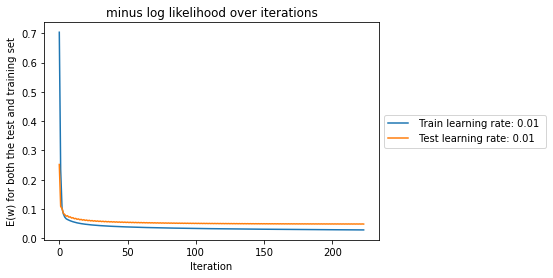

In [12]:
ls = LineSearch(np.random.uniform(size=784)/(784/2), 0.01, 224)
ls.train(X_train, Y_train2)

In [13]:
import time

#minimization
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar

#params to pass for optmization
# xop=0
# wop=0
# top=0

# def Eoptimize(c):
#   Y= get_yop( xop, c*wop)
#   a=np.dot(top,np.log(Y))
#   b=np.dot((1-top),np.log(1-Y))
#   return -1/N*(a+b)


# def get_yop(x, w):
#     print(xop)
#     wx = np.dot(w,xop.T)
#     y=sigmoidop(wx)
#     return(y)

# def sigmoidop(x):
#       return (1/(1+np.exp(-x)))

def test(x):
  return x

res = minimize_scalar(test, bracket=None, bounds=[-10,10], args=(), method='bounded', tol=None, options=None)
print(res)





class Conjugate:
  def __init__(self, w_init, learning_rate, iterations):
      self.iterations = iterations
      self.w = w_init
      self.learning_rate = learning_rate
      self.y = np.array([])
      self.dim = 784

      #constants for optimization
      self.xop=0
      self.wop=0
      self.top=0
      self.dwop=0



  def test(self,x):
    return x

  def Eoptimize(self,a):
    Y=self.get_ybetter( self.xop, self.wop+self.dwop*a)
    res=self.errorValue(Y,self.top,self.dim,self.xop)
    return self.errorValue(Y,self.top,self.dim,self.xop)

  # find the a such that E(w+ad) is minimized and return ad
  def linOptimize(self,d,W,X,T):
    a=1
    self.wop=W
    self.xop=X
    self.top=T
    self.dwop=d
    #note: shrinking the bound over time could speed things up
    res=minimize_scalar(self.Eoptimize, bracket=None, bounds=[0,1000], args=(), method='bounded', tol=None, options=None)
    # print(res)
    # get the resulting scalar
    a=res["x"]

    return a*d
  
  def train(self, X, T):
      start_time = time.time()
      N = len(X)
      final_y = []
      E_plot = np.array([])
      MSE_plot = np.array([])
      test_plot = np.array([])
      old_grad = np.random.uniform(size=784)/784
      old_direction = np.random.uniform(size=784)/784
      for i in range(self.iterations):
        #learned_y = self.get_y(X, self.w)
        # TODO remove above 
        learned_y = self.get_ybetter(X, self.w)

        #time comparisons temp
        dw = -self.GDbetter(X, learned_y, T, N)

        beta = (np.dot((dw - old_grad), dw))/np.linalg.norm(old_grad)**2
        old_grad = dw

        dw = dw + beta*old_direction

        old_direction = dw

        #looks for the best scalar to add to dw
        #constants for optimization
        self.xop=X
        self.wop=self.w
        self.top=T
        self.dwop=dw
        self.w += self.linOptimize(dw,self.w,X,T)

        final_y = learned_y
        #MSE is not of interest 
        # MSE_plot = np.append(MSE_plot, self.MSE(final_y, T))
        E_plot = np.append(E_plot, self.errorValue(final_y, T,N,X))

        #tracks the test error
        X2=X_test
        N2 = len(X2)
        T2=Y_test2
        y2=self.get_ybetter(X2,self.w)
        test_plot = np.append(test_plot, self.errorValue(y2, T2,N2,X2))
        #temp
        # print("MSE") 
        # print(self.MSE(final_y, T))
        # print("errorval")
        # print(self.errorValue(final_y,T,N,X))
        if (i%10==0):
          print(i)

    # Mean squared error is not the one we want
    #  self.plot(MSE_plot)
      print("time elapsed")
      print(str(time.time()-start_time) + "  seconds")
      print("final E(w) for training set")
      print(E_plot[-1])
      print("final E(w) for test set")
      print(test_plot[-1])
      print("training classification error")
      print(self.classError(self.get_ybetter(X, self.w),Y_train2))
      print("test classification error")
      print(self.classError(self.get_ybetter(X_test, self.w),Y_test2))
      self.plot(E_plot, 'Train')
      self.plot(test_plot, 'Test')
  
  #actual error function used
  def errorValue(self,Y,T,N,X):
    a=np.dot(T,np.log(Y))
    b=np.dot((1-T),np.log(1-Y))
    return -1/N*(a+b)

  def MSE(self, Y, T):
    return np.mean(np.square(Y - T))

  def plot(self, xy, label):
    plt.title('minus log likelihood over iterations')
    plt.xlabel('Iteration')
    plt.ylabel('E(w) for both the test and training set')
    plt.plot(xy, label = " {} learning rate: {} ".format(label, self.learning_rate))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

  #attempt to optimize the GD calculation
  def GDbetter(self, X, Y, T, N):
    sub = np.subtract(Y,T) # this had an error was scalar instead of vector
    testres=np.dot(sub,X)/N
    return self.learning_rate * (testres)
    
  # NOT USED!!!
  # def GD(self, X, Y, T, N):
  #     total = np.array([])
  #     #for i , 1 ... d
  #     for i in range(self.dim):
          
  #         #subtract vector t from y
  #         sub = np.subtract(Y,T) # this had an error was scalar instead of vector
  #         #take 1/N the inner product of this vector and the vector x[i] which is equal 1/N times the sum of elementwise multiplication
  #         gradres = np.dot(sub, X.T[i])/N
  #         total = np.append(total, gradres)

  #     return self.learning_rate * (total)

  def sigmoid(self, x):
      return (1/(1+np.exp(-x)))

  def classError(self,Y,T):
    a=abs(Y-T)
    return sum(a)/len(a)

  #attempt to optimize
  def get_ybetter(self, x, w):
    self.y = np.array([])
    wx = np.dot(w,x.T)
    y=self.sigmoid(wx)
    return(y)

     fun: -9.99999335625205
 message: 'Solution found.'
    nfev: 31
  status: 0
 success: True
       x: -9.99999335625205


0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:146: RuntimeWarning: divide by zero encountered in log


10
20
30
40
50
60
70
80
90
100
time elapsed
35.739285707473755  seconds
final E(w) for training set
0.02674314568325774
final E(w) for test set
0.04870961734881135
training classification error
0.015811930860225084
test classification error
0.022224572817352687


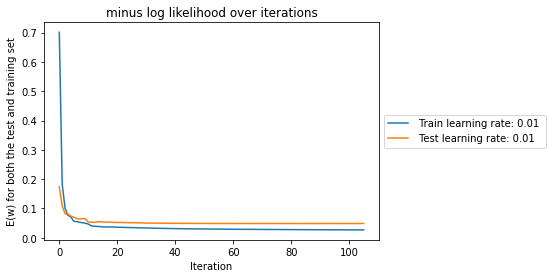

In [14]:
conjugate = Conjugate(np.random.uniform(size=784)/(784/2), 0.01, 106)
conjugate.train(X_train, Y_train2)

In [15]:
class SGD:
  def __init__(self, w_init, learning_rate, iterations, batches):
      self.batches = batches
      self.iterations = iterations
      self.w = w_init
      self.learning_rate = learning_rate
      self.y = np.array([])
      self.dim = 784
    

  def classError(self,Y,T):
    a=abs(Y-T)
    return sum(a)/len(a)
 
  def train(self, X, T):
      start_time = time.time()
      test_plot = np.array([])
      N = self.batches
      # Hard coded
      X = np.split(X, N)
      T = np.split(T, N)
      final_y = []
      E_plot = np.array([])
      test_plot = np.array([])
      for i in range(self.iterations):
        # Batch update
        for j in range(N):

          learned_y = self.get_y(X[j], self.w)
          dw = self.GD(X[j], learned_y, T[j], N)
          self.w -= dw
          final_y = learned_y
          X3=X_train
          N3 = len(X3)
          T3=Y_train2
          y3=self.get_ybetter(X3,self.w)
          E_plot = np.append(E_plot,  self.errorValue(y3, T3,N3,X3))
          X2=X_test
          N2 = len(X2)
          T2=Y_test2
          y2=self.get_ybetter(X2,self.w)
          test_plot = np.append(test_plot, self.errorValue(y2, T2,N2,X2))
      self.plot(E_plot, 'Train')
      self.plot(test_plot, 'Test')
      print("time elapsed")
      print(str(time.time()-start_time) + "  seconds")
      print("final E(w) for training set")
      print(E_plot[-1])
      print("final E(w) for test set")
      print(test_plot[-1])
      print("training classification error")
      print(self.classError(self.get_ybetter(X_train, self.w),Y_train2))
      print("test classification error")
      print(self.classError(self.get_ybetter(X_test, self.w),Y_test2))


    #actual error function used
  def errorValue(self,Y,T,N,X):
    a=np.dot(T,np.log(Y))
    b=np.dot((1-T),np.log(1-Y))
    return -1/N*(a+b)
    
  def plot(self, xy, label):
      plt.title('minus log likelihood over iterations')
      plt.xlabel('Iteration')
      plt.ylabel('E(w) for both the test and training set')
      t = np.arange(0., self.iterations , 1/self.batches)
      plt.plot(t, xy, label = " {} learning rate: {} ".format(label, self.learning_rate))
      plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

  # def GD(self, X, Y, T, N):
  #     total = np.array([])
  #     #for i , 1 ... d
  #     for i in range(self.dim):
          
  #         #subtract vector t from y
  #         sub = np.subtract(Y,T) # this had the error was scalar instead of vector
  #         #take 1/N the inner product of this vector and the vector x[i] which is equal 1/N times the sum of elementwise multiplication
  #         gradres = np.dot(sub, X.T[i])/N
  #         total = np.append(total, gradres)

  #     return self.learning_rate * (total)

  def sigmoid(self, x):
      return (1/(1+np.exp(-x)))

  # def get_y(self, x, w):
  #   self.y = np.array([])
  #   for x_u in x:
  #     #dot product of w,x^u
  #     wx = np.dot(w, x_u) 

  #     # sigmoid function on this inner product
  #     y_u = self.sigmoid(wx)
     
  #     # y is a vector over the u
  #     self.y = np.append(self.y, y_u)

  #   return(self.y)

    #attempt to optimize
  def get_y(self, x, w):
    self.y = np.array([])
    wx = np.dot(w,x.T)
    y=self.sigmoid(wx)
    return(y)
  
  #same function different name
  def get_ybetter(self, x, w):
    self.y = np.array([])
    wx = np.dot(w,x.T)
    y=self.sigmoid(wx)
    return(y)

    #attempt to optimize the GD calculation
  def GD(self, X, Y, T, N):
    sub = np.subtract(Y,T) # this had an error was scalar instead of vector
    testres=np.dot(sub,X)/N
    return self.learning_rate * (testres)

time elapsed
12.790019512176514  seconds
final E(w) for training set
0.031025905873322938
final E(w) for test set
0.04888004494515737
training classification error
0.018126897410219646
test classification error
0.023776899337307814


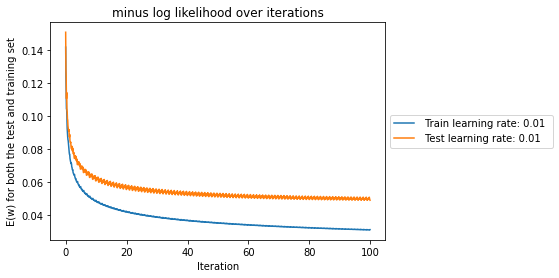

In [17]:
sgd = SGD(np.random.uniform(size=784)/784, 0.01, 100, 12)
sgd.train(X_train, Y_train2)

# Discussion: 
Discuss how the results for this problem (logisitic regression on the MNIST data) are expected to change for other data sets (more samples N or more variables n) and methods (more variables w such as deep neural networks). 

ANSWER: </br>
More samples N can never be a bad thing for logistic regression, or any model, because we use data to train and the more data the more we can train without overfitting.

More variables n would mean that we could run into problems if there are to many variables. This would be caused by the phenomenon called curse of dimensionality. The more variables the harder it is to compute.

More variables w as in deep neural network would most of the time give a better result. this however has some drawbacks such as being harder to compute, risking overfitting if regularization is not added. 